## 数据归一化处理,

因为量纲的不同,导致数据在参与计算时,实际比重会很大不同

如:体重:65kg, 身高:185cm

65 相比较于185,在使用kNN计算距离时显得比重较小

为了解决这个问题,通常使用数据归一化处理,将所有数据映射到同一尺度

### 最值归一化 Normalization

将原始数据线性化的方法转换到[0 1]的范围，归一化公式如下：

`X_scale = x - min(x) / max(x) - min(x)`

其中max(x)为样本数据的最大值，min(x)为样本数据的最小值.

适用于分布有明显边界的情况,如试卷得分为:0-100分


缺陷:
- 受outlier影响大, 比如人均收入,有的人月薪5000,而有的人可能有5000000.映射到[0,1]区间,那么500000对应的区间就非常接近1,而5000的收入就接近0,

- 当有新数据加入时,可能导致max(x)和min(x)的变化,需要重新定义

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randint(0, 100, 100)  # [0,100) 100个数据
x


array([42, 10, 59,  4, 28, 17, 50, 16, 18, 95, 49, 66, 89, 84,  5, 73, 38,
       21,  6, 16, 13, 99, 18, 61,  8, 72, 15, 51, 80, 44, 20, 60, 40,  3,
       93, 53, 72, 58, 41, 14, 58, 66, 21, 45, 73, 44, 38, 76, 68, 80, 87,
       13, 68, 24, 24, 28, 53, 23, 94, 56, 83, 22, 11, 53, 26,  9, 86, 37,
       36, 65, 17, 52, 90, 14, 63, 54, 10, 68, 63, 65, 85, 56, 95, 53, 64,
       15, 42, 47, 96, 79, 98, 23, 55, 44,  0, 60, 49, 42, 44, 51])

In [3]:
# 最值归一化计算
(x - np.min(x)) / (np.max(x) - np.min(x))


array([0.42424242, 0.1010101 , 0.5959596 , 0.04040404, 0.28282828,
       0.17171717, 0.50505051, 0.16161616, 0.18181818, 0.95959596,
       0.49494949, 0.66666667, 0.8989899 , 0.84848485, 0.05050505,
       0.73737374, 0.38383838, 0.21212121, 0.06060606, 0.16161616,
       0.13131313, 1.        , 0.18181818, 0.61616162, 0.08080808,
       0.72727273, 0.15151515, 0.51515152, 0.80808081, 0.44444444,
       0.2020202 , 0.60606061, 0.4040404 , 0.03030303, 0.93939394,
       0.53535354, 0.72727273, 0.58585859, 0.41414141, 0.14141414,
       0.58585859, 0.66666667, 0.21212121, 0.45454545, 0.73737374,
       0.44444444, 0.38383838, 0.76767677, 0.68686869, 0.80808081,
       0.87878788, 0.13131313, 0.68686869, 0.24242424, 0.24242424,
       0.28282828, 0.53535354, 0.23232323, 0.94949495, 0.56565657,
       0.83838384, 0.22222222, 0.11111111, 0.53535354, 0.26262626,
       0.09090909, 0.86868687, 0.37373737, 0.36363636, 0.65656566,
       0.17171717, 0.52525253, 0.90909091, 0.14141414, 0.63636

In [4]:
# 二维数组最值归一化计算

X = np.random.randint(0, 100, (25,4))
X

array([[22, 65, 83, 10],
       [14, 24, 85, 81],
       [61, 71, 78, 13],
       [10, 15, 36, 36],
       [18, 69, 37, 58],
       [64, 93, 71, 69],
       [28,  3, 11,  3],
       [10, 43, 10, 56],
       [86, 82, 44, 95],
       [75,  8, 94, 42],
       [88, 59, 65, 19],
       [81, 63, 21, 45],
       [18, 20,  2, 25],
       [68, 79, 12, 76],
       [95, 44, 44, 25],
       [81, 89,  7, 35],
       [ 8, 50, 98, 89],
       [34, 58, 47,  7],
       [45, 46, 23,  3],
       [ 9,  9, 65, 27],
       [22, 96, 23,  5],
       [86, 57, 66, 97],
       [36, 15, 36, 37],
       [34, 28,  7,  2],
       [29, 93, 90,  1]])

In [7]:
# 将数据类型转换为float
X = np.array(X, dtype=float)

# 对每一个特征做最值归一化计算(即每一列数据做处理)
for i in range(X.shape[1]):
    X[:,i] = (X[:,i] - np.min(X[:,i])) / (np.max(X[:,i]) - np.min(X[:,i]))
X


array([[0.16091954, 0.66666667, 0.84375   , 0.09375   ],
       [0.06896552, 0.22580645, 0.86458333, 0.83333333],
       [0.6091954 , 0.7311828 , 0.79166667, 0.125     ],
       [0.02298851, 0.12903226, 0.35416667, 0.36458333],
       [0.11494253, 0.70967742, 0.36458333, 0.59375   ],
       [0.64367816, 0.96774194, 0.71875   , 0.70833333],
       [0.22988506, 0.        , 0.09375   , 0.02083333],
       [0.02298851, 0.43010753, 0.08333333, 0.57291667],
       [0.89655172, 0.84946237, 0.4375    , 0.97916667],
       [0.77011494, 0.05376344, 0.95833333, 0.42708333],
       [0.91954023, 0.60215054, 0.65625   , 0.1875    ],
       [0.83908046, 0.64516129, 0.19791667, 0.45833333],
       [0.11494253, 0.1827957 , 0.        , 0.25      ],
       [0.68965517, 0.8172043 , 0.10416667, 0.78125   ],
       [1.        , 0.44086022, 0.4375    , 0.25      ],
       [0.83908046, 0.92473118, 0.05208333, 0.35416667],
       [0.        , 0.50537634, 1.        , 0.91666667],
       [0.29885057, 0.59139785,

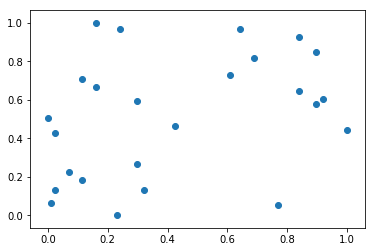

In [13]:
# 绘制散点图
plt.scatter(X[:,0],X[:,1])  # 取前两列特征查看
plt.show()

In [20]:
# 查看均值和标准差 (主要对比标准归一化)
print('均值为:', [np.mean(X[:,i]) for i in range(X.shape[1])])
print('标准差为:', [np.std(X[:,i]) for i in range(X.shape[1])])


均值为: [0.4239080459770115, 0.5178494623655914, 0.46041666666666664, 0.38791666666666663]
标准差为: [0.33948847456508946, 0.3103141601999181, 0.31754264805429416, 0.32126972485920785]


### 标准归一化 


将原始数据集归一化到均值为0、方差1的分布中，归一化公式如下：

 `X_scale = x - mean(x) / std(x)`

mean(x) 表示所有样本数据的平均值,std(x)表示所有样本数据的标准差

标准归一化解决了最值归一化的缺点,适用于没有明显临界的数据
   

In [24]:
X2 = np.random.randint(0, 100, (50, 2))
X2 = np.array(X2, dtype=float)
X2[:10,:]

array([[36., 83.],
       [ 1., 78.],
       [83., 58.],
       [81., 44.],
       [35., 54.],
       [85., 62.],
       [49., 64.],
       [55., 34.],
       [16.,  9.],
       [30., 99.]])

In [27]:
# 对每一个特征做标准归一化计算(即每一列数据做处理)
for i in range(X2.shape[1]):
    X2[:,i] = (X2[:,i] - np.mean(X2[:,i])) / np.std(X2[:,i])
X2[:10,:]

array([[-0.41265967,  1.42827464],
       [-1.77264916,  1.24412371],
       [ 1.41361193,  0.50751997],
       [ 1.33589825, -0.00810264],
       [-0.45151651,  0.36019923],
       [ 1.49132562,  0.65484072],
       [ 0.09247929,  0.72850109],
       [ 0.32562034, -0.37640451],
       [-1.18979652, -1.29715917],
       [-0.64580072,  2.01755763]])

In [28]:
# 查看均值和标准差 (主要对比标准归一化)
print('均值为:', [np.mean(X2[:,i]) for i in range(X2.shape[1])])  # -17次方,无限接近于0
print('标准差为:', [np.std(X2[:,i]) for i in range(X2.shape[1])])


均值为: [3.552713678800501e-17, 1.7763568394002505e-17]
标准差为: [1.0, 1.0]


根据结果可以验证,标准归一化将原始数据集归一化到均值为0、方差1的分布中